In [1]:
import pickle
from matplotlib import pyplot as plt
subjects = {}
subjectslist = ['Subject1','Subject2','Subject3','Subject4','Subject6','Subject8','Subject9','Subject10','Subject11','Subject12']
for n in subjectslist:
    file = n + '.pkl'
    fileopen = open('MScDataAnalysis/'+file, 'rb')
    subjects[n] = pickle.load(fileopen)
    fileopen.close()
    trialnames = list(set(subjects[n].keys()))

In [2]:
trials = ['OWN','D50','D100','D150']
paramnames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is float]
print(paramnames)
vectornames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is not float]
print(vectornames)

['LeftFoffFraction', 'RightSpeed', 'RightStepTime', 'LeftStepLen', 'LeftStepTime', 'LeftSpeedCalc', 'RightSpeedCalc', 'RightFoffFraction', 'RightStepLen', 'LeftSpeed', 'LeftStrideLen', 'RightStrideLen']
['LeftAnkleAngle', 'RightAnkleAngle', 'Frames', 'LeftToeZ', 'RightToeZ']


In [3]:
for subject in subjectslist:
    for trial in trials:
        try:
            toe = subjects[subject][trial]['RightToeZ']
            subjects[subject][trial]['MaxRtoeZ'] = max(toe[int(len(toe)*0.2):int(len(toe)*0.8)])
            subjects[subject][trial]['MinRtoeZ'] = min(toe[int(len(toe)*0.2):int(len(toe)*0.8)])
        except KeyError:
            continue

In [30]:
data = [[] for _ in range(len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    for trialnum in range(len(trials)):
        try:
            trial = trials[trialnum]
            data[trialnum].append(subjects[subject][trial]['LeftStrideLen'])
            print(data)
            print(trialnum)
        except KeyError:
            continue

[[0.967286], [], [], []]
0
[[0.967286], [1.07487], [], []]
1
[[0.967286], [1.07487], [1.15422], []]
2
[[0.967286], [1.07487], [1.15422], [1.15512]]
3
[[0.967286, 0.802668], [1.07487], [1.15422], [1.15512]]
0
[[0.967286, 0.802668], [1.07487, 0.789416], [1.15422], [1.15512]]
1
[[0.967286, 0.802668], [1.07487, 0.789416], [1.15422, 0.789416], [1.15512]]
2
[[0.967286, 0.802668], [1.07487, 0.789416], [1.15422, 0.789416], [1.15512, 0.789416]]
3
[[0.967286, 0.802668, 1.12091], [1.07487, 0.789416], [1.15422, 0.789416], [1.15512, 0.789416]]
0
[[0.967286, 0.802668, 1.12091], [1.07487, 0.789416, 0.982467], [1.15422, 0.789416], [1.15512, 0.789416]]
1
[[0.967286, 0.802668, 1.12091], [1.07487, 0.789416, 0.982467], [1.15422, 0.789416, 0.911773], [1.15512, 0.789416]]
2
[[0.967286, 0.802668, 1.12091], [1.07487, 0.789416, 0.982467], [1.15422, 0.789416, 0.911773], [1.15512, 0.789416, 0.900535]]
3
[[0.967286, 0.802668, 1.12091, 0.863453], [1.07487, 0.789416, 0.982467], [1.15422, 0.789416, 0.911773], [1.155

In [24]:
subjects['Subject1']['D100']

{'Frames': {'LeftEnd': 221,
  'LeftFoff': 175,
  'LeftStart': 107,
  'RightEnd': 270,
  'RightFoff': 234,
  'RightStart': 163},
 'LeftAnkleAngle': [-0.895529,
  -0.463264,
  -0.0304453,
  0.402955,
  0.837069,
  1.27258,
  1.70993,
  2.1498,
  2.59239,
  3.03759,
  3.48496,
  3.9334,
  4.38115,
  4.82587,
  5.26464,
  5.69401,
  6.11077,
  6.51225,
  6.89761,
  7.26839,
  7.62863,
  7.98512,
  8.34643,
  8.72276,
  9.12386,
  9.55849,
  10.0325,
  10.5492,
  11.1085,
  11.7076,
  12.3409,
  13.0018,
  13.683,
  14.3775,
  15.0788,
  15.7813,
  16.4802,
  17.1718,
  17.8527,
  18.5192,
  19.1666,
  19.788,
  20.3736,
  20.9103,
  21.381,
  21.765,
  22.0377,
  22.1714,
  22.1362,
  21.9011,
  21.4362,
  20.7146,
  19.7161,
  18.4321,
  16.8722,
  15.071,
  13.0921,
  11.0266,
  8.98595,
  7.08633,
  5.4311,
  4.09448,
  3.11231,
  2.48262,
  2.17301,
  2.13379,
  2.30859,
  2.64218,
  3.08467,
  3.59377,
  4.13529,
  4.68279,
  5.21696,
  5.72469,
  6.19755,
  6.63151,
  7.02534,
  7.38

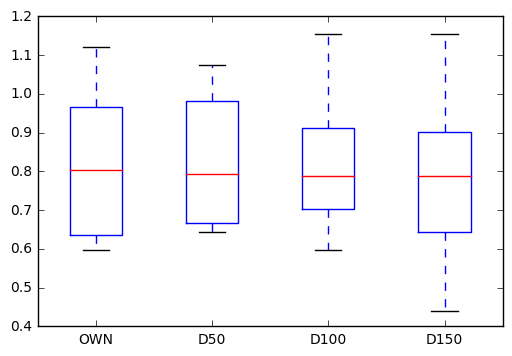

In [31]:
%matplotlib inline
box = plt.boxplot(data, labels=trials)

In [15]:
print(len(data))
print(len(trialnames))
print(len(data[0]))

4
15
36
